<a href="https://colab.research.google.com/github/Oubouzafaty/colab/blob/main/Copie_de_result_dataset_49_heart_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [1057]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns

import the datasets

In [1058]:
import urllib.request
Data_path = os.path.join("Dataset", "/csv_result-dataset_49_heart-c.csv")
download_path = "https://raw.githubusercontent.com/oubouza/project/main/csv_result-dataset_49_heart-c.csv"
os.makedirs("Dataset", exist_ok=True)
urllib.request.urlretrieve(download_path, Data_path)
Data=pd.read_csv(Data_path, sep=',',encoding='latin1')

In [1059]:
Data

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,male,typ_angina,145,233,t,left_vent_hyper,150,no,2.3,down,0,fixed_defect,<50
1,2,67,male,asympt,160,286,f,left_vent_hyper,108,yes,1.5,flat,3,normal,>50_1
2,3,67,male,asympt,120,229,f,left_vent_hyper,129,yes,2.6,flat,2,reversable_defect,>50_1
3,4,37,male,non_anginal,130,250,f,normal,187,no,3.5,down,0,normal,<50
4,5,41,female,atyp_angina,130,204,f,left_vent_hyper,172,no,1.4,up,0,normal,<50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,68,male,asympt,144,193,t,normal,141,no,3.4,flat,2,reversable_defect,>50_1
299,300,57,male,asympt,130,131,f,normal,115,yes,1.2,flat,1,reversable_defect,>50_1
300,301,57,female,atyp_angina,130,236,f,left_vent_hyper,174,no,0.0,flat,1,normal,>50_1
301,302,38,male,non_anginal,138,175,f,normal,173,no,0.0,up,?,normal,<50


In [1060]:
#Descriptive statistics for numeric columns
Data.describe()

,id,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.366337,131.623762,246.264026,149.646865,1.039604
std,87.612784,9.082101,17.538143,51.830751,22.905161,1.161075
min,1.000000,29.000000,94.000000,126.000000,71.000000,0.000000
25%,76.500000,47.500000,120.000000,211.000000,133.500000,0.000000
50%,152.000000,55.000000,130.000000,240.000000,153.000000,0.800000
75%,227.500000,61.000000,140.000000,274.500000,166.000000,1.600000
max,303.000000,77.000000,200.000000,564.000000,202.000000,6.200000


In [1061]:
#non-null values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    object 
 3   cp        303 non-null    object 
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    object 
 7   restecg   303 non-null    object 
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    object 
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    object 
 12  ca        303 non-null    object 
 13  thal      303 non-null    object 
 14  num       303 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 35.6+ KB


In [1062]:
#Number of missing values ​​in each column of the dataset
Data.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<Axes: >

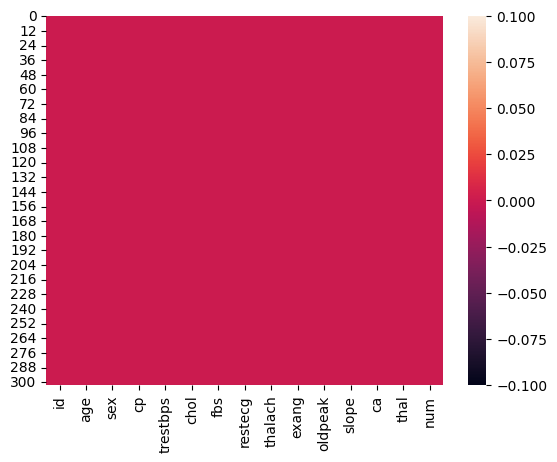

In [1063]:
#Heat map of missing values ​​in the dataset
sns.heatmap(Data.isnull())

In [1064]:
#Nombre de lignes en double dans le jeu de données
Data.duplicated().sum()

0

Division des données :

Analysis


In [1065]:
# Distribution of Unique IDs
Data['id'].value_counts()

1      1
209    1
207    1
206    1
205    1
      ..
101    1
100    1
99     1
98     1
303    1
Name: id, Length: 303, dtype: int64

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>],
       [<Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'oldpeak'}>]], dtype=object)

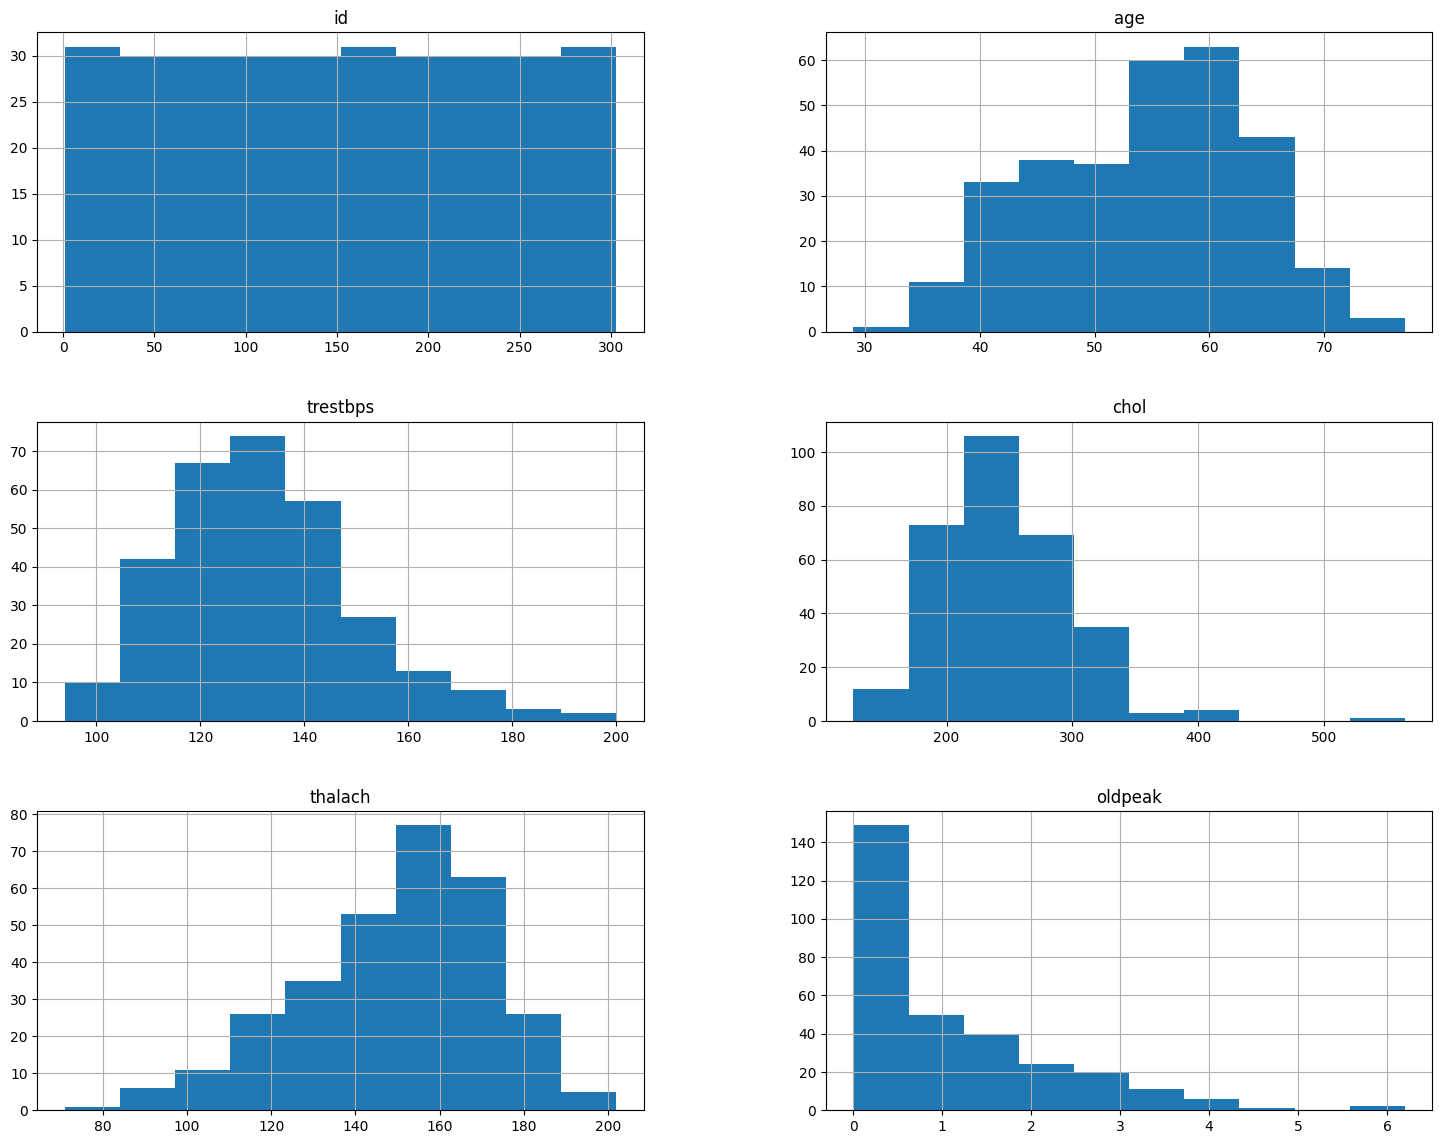

In [1066]:
#generate a set of histograms for each numeric variable in the DataFrame Data, with a figure size of 18 inches wide and 14 inches high
Data.hist(figsize=(18,14))

In [1067]:
#calculate the correlation matrix between all pairs of numeric variables in the DataFrame
cor=Data.corr()

<ipython-input-1067-b88b1b0097bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=Data.corr()


<Axes: >

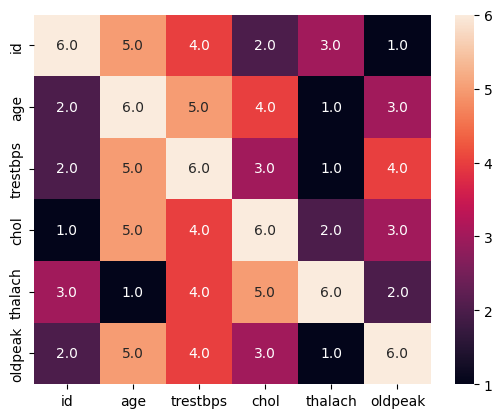

In [1068]:
#Correlation Ranking Heatmap
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f')

<Axes: xlabel='num', ylabel='count'>

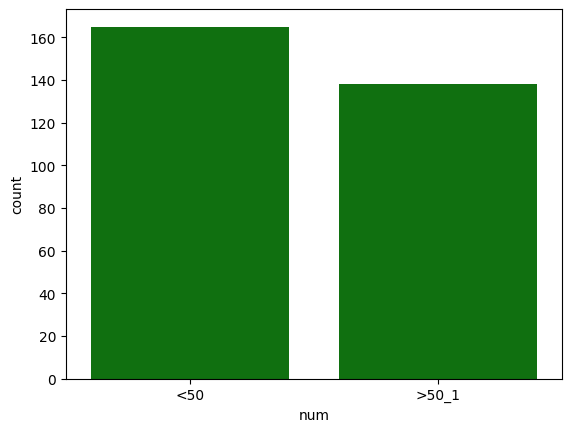

In [1069]:
#visualize the distribution of 'num' values ​​with uniform color.
sns.countplot(data=Data,x='num', color='green')

<Axes: xlabel='num', ylabel='count'>

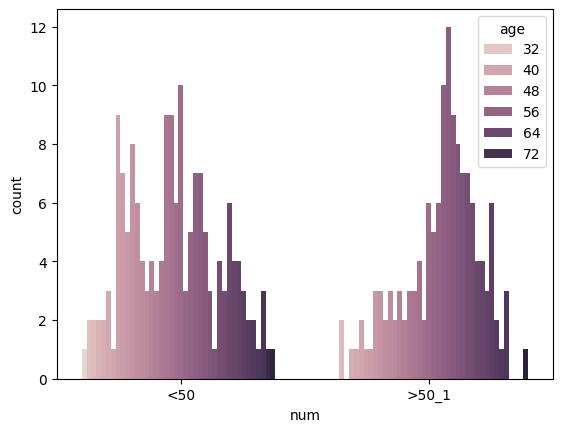

In [1070]:
#visualize the distribution of 'num' values ​​according to different age categories.
sns.countplot(data=Data,x='num',hue='age')

In [1071]:
# Vérification des formes des ensembles résultants
#print("Training set shape:", X_train.shape, y_train.shape)
#print("Testing set shape:", X_test.shape, y_test.shape)

Processing Data


In [1072]:
from sklearn.preprocessing import OrdinalEncoder
lab=OrdinalEncoder()

In [1073]:
#analyser et traiter différemment les données de différentes natures, les variables catégorielles (objets) et normaliser les variables numériques (non objets) .
obj=Data.select_dtypes(include=['object']) #categorical data
non_obj=Data.select_dtypes(exclude=['object']) ##numeric data
non_obj.columns

Index(['id', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [1074]:
#Transformation of categorical data into numerical data.
for i in obj.columns :
  Data[i]=lab.fit_transform(Data[[i]])


In [1075]:
Data=Data.drop(columns=['id']) #Drop column 'id'
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [1076]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1.0,3.0,145,233,1.0,0.0,150,0.0,2.3,0.0,0.0,1.0,0.0
1,67,1.0,0.0,160,286,0.0,0.0,108,1.0,1.5,1.0,3.0,2.0,1.0
2,67,1.0,0.0,120,229,0.0,0.0,129,1.0,2.6,1.0,2.0,3.0,1.0
3,37,1.0,2.0,130,250,0.0,1.0,187,0.0,3.5,0.0,0.0,2.0,0.0
4,41,0.0,1.0,130,204,0.0,0.0,172,0.0,1.4,2.0,0.0,2.0,0.0


In [1077]:
#count the number of occurrences of each value in the 'num' column
Data['num'].value_counts()
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [1078]:
#Scalind data
data_to_scale = Data[['age','cp','trestbps','chol','thalach','oldpeak','ca','slope','thal']]
scaler = MinMaxScaler()

for i in data_to_scale.columns :
  Data[i]=scaler.fit_transform(Data[[i]])

Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,0.0
1,0.791667,1.0,0.000000,0.622642,0.365297,0.0,0.0,0.282443,1.0,0.241935,0.5,0.75,0.666667,1.0
2,0.791667,1.0,0.000000,0.245283,0.235160,0.0,0.0,0.442748,1.0,0.419355,0.5,0.50,1.000000,1.0
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,1.0,0.885496,0.0,0.564516,0.0,0.00,0.666667,0.0
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,0.0


In [1079]:
#Assign x and y
#X=Data.iloc[:,:-1].values
#y=Data.iloc[:,:1].values
X=Data.drop(columns='num')
y=Data['num']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


Model Training

Logistic Regression

In [1080]:
from sklearn.model_selection import train_test_split
# Diviser l'ensemble de données en ensembles de formation (80 %) et de test (20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1081]:
model = LogisticRegression()

In [1082]:
#Taille de l'Ensemble de Données
len(X)

303

In [1083]:
#len(X_train)

In [1084]:
model.fit(X_train, y_train)

LogisticRegression()

In [1085]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0.])

In [1086]:
model.score(X_test,y_test)

0.8360655737704918

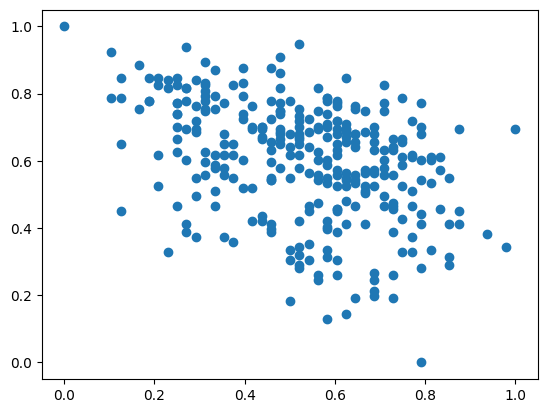

In [1087]:
# Scatter plot of Age vs. Maximum Heart Rate
plt.scatter(Data['age'],Data['thalach'])

In [1088]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1089]:
model = RandomForestClassifier(random_state=42)


In [1090]:
#Taille de l'Ensemble de Données
len(X)

303

In [1091]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [1095]:
model.score(X_test,y_test)

0.8524590163934426

Grid search CV

In [1096]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [1097]:
para={'n_estimators':[20,60,100,120],
      'max_features' : [0.2,0.6,1.0],
      'max_depth':[2,8,None],
      'max_samples':[0.5,0.75,1.0]
     }

In [1098]:
rf=RandomForestClassifier()

In [1099]:
rf_grid=GridSearchCV(estimator=rf,
                   param_grid=para,
                   cv=5)

In [1101]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]})

In [1102]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 100}

In [1103]:
rf_grid.best_score_

0.8429421768707483